In [1]:
from neuron import h
import numpy as np
import pickle, time, os
from matplotlib import pyplot as plt
from neuron.units import ms, mV
h.load_file('stdrun.hoc')


1.0

In [2]:
# warning, some units might be off
# in practice double check units + conversion 
h('''
    celsius = 20
    dt = 0.01
    
    v_init = -69
    tstop = 150
    
    create soma
    soma {
        insert pas 
        e_pas = -50
        g_pas = 3e-5
        
        insert nahh 
        ena = 55
        gnabar_nahh = 0.12

        insert khh 
        ek=-72
        gkbar_khh = 0.036
    }
''')

soma = h.soma
iclamp = h.IClamp(soma(0.5))
iclamp.delay = 20
iclamp.dur = 100
iclamp.amp = 8


	1 


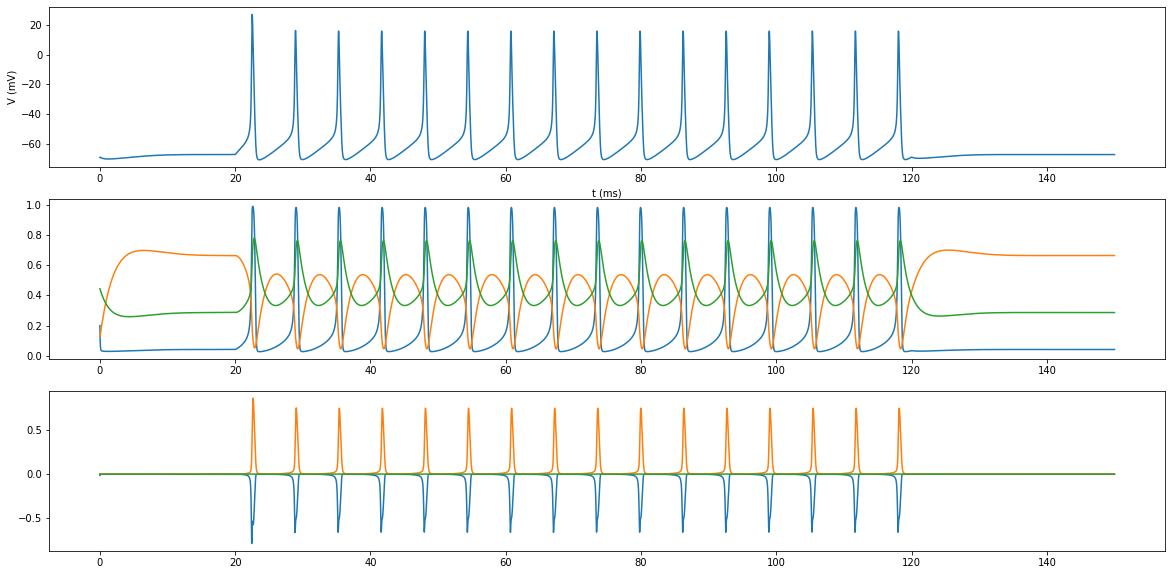

In [3]:
v = h.Vector().record(soma(0.5)._ref_v) 
t = h.Vector().record(h._ref_t) 

m_hh = h.Vector().record(soma(0.5)._ref_m_nahh)
h_hh = h.Vector().record(soma(0.5)._ref_h_nahh)
ina_hh = h.Vector().record(soma(0.5)._ref_ina)

n_hh = h.Vector().record(soma(0.5)._ref_n_khh)
ik_hh = h.Vector().record(soma(0.5)._ref_ik)

i_leak = h.Vector().record(soma(0.5)._ref_i_pas)

h('finitialize(v_init)')
h.continuerun(h.tstop)

plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')

plt.subplot(312)
plt.plot(t, m_hh, label='m')
plt.plot(t, h_hh, label='h')
plt.plot(t, n_hh, label='n')

plt.subplot(313)
plt.plot(t, ina_hh, label='I_Na')
plt.plot(t, ik_hh, label='I_K')
plt.plot(t, i_leak, label='leak')



plt.show()